# Intro to Statistics

This class, *Intro to Statistics*, builds on probability theory to enable us to quantify our confidence about how distributions of data are related to one another. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of all of the essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms. You’ll also learn how to use regression to make predictions about the future based on training data. 

The content covered in this class builds on the content of other classes in the *Machine Learning Foundations* series (linear algebra, calculus, and probability theory) and is itself foundational for the *Optimization* class. 

Over the course of studying this topic, you'll: 

* Develop an understanding of what’s going on beneath the hood of predictive statistical models and machine learning algorithms, including those used for deep learning. 
* Hypothesize about and critically evaluate the inputs and outputs of machine learning algorithms using essential statistical tools such as the t-test, ANOVA, and R-squared. 
* Use historical data to predict the future using regression models that take advantage of frequentist statistical theory (for smaller data sets) and modern machine learning theory (for larger data sets), including why we may want to consider applying deep learning to a given problem.




*Segment 1: Frequentist Statistics*

* Frequentist vs Bayesian Statistics
* Review of Relevant Probability Theory
* *z*-scores and Outliers
* *p*-values
* Comparing Means with t-tests
* Confidence Intervals
* ANOVA: Analysis of Variance
* Pearson Correlation Coefficient
* R-Squared Coefficient of Determination
* Correlation vs Causation
* Correcting for Multiple Comparisons 

## Frequentist Statistics

In [5]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
np.random.seed(42)

### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [ ]:
!pip install scipy

In [7]:
x = st.skewnorm.rvs(10, size=1000)

In [ ]:
x[0:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

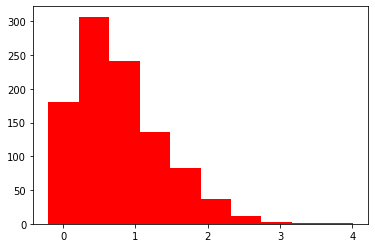

In [ ]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'red')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [11]:
xbar = x.mean()
xbar

0.7719211854654121

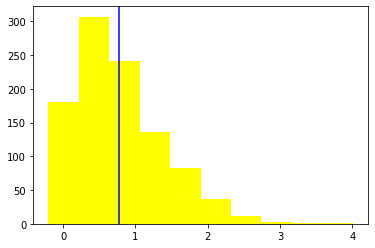

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='blue')
_ = plt.hist(x, color = 'yellow')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [ ]:
np.median(x) 

0.651420257427958

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

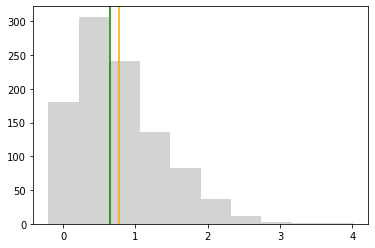

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Measures of Dispersion

#### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [ ]:
x.var()

0.35528419278021617

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

In [8]:
x.var()**(1/2)

0.5960572059628305

In [9]:
sigma = x.std()
sigma

0.5960572059628305

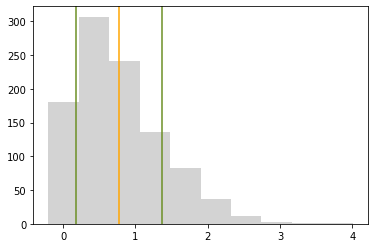

In [13]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [ ]:
sigma/(x.size)**(1/2)

0.018848983865986414

In [ ]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.018858415432183823

In [ ]:
st.sem(x, ddof=0)

0.018848983865986414

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

### Gaussian Distribution

After Carl Friedrich Gauss. Also known as **normal distribution**: 

In [ ]:
x = np.random.normal(size=10000)

In [ ]:
sns.set_style('ticks')

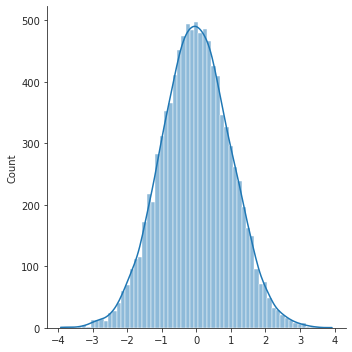

In [ ]:
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [ ]:
x.mean()

-0.01626305454909193

In [ ]:
x.std()

1.0039756140435032

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [ ]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-1.44840250e+00, -5.86609487e-01, -1.80028849e+00,  2.75991320e-01,
        1.77563962e+00,  1.13744189e+00, -1.43283200e-03,  9.59173870e-01,
       -7.13605754e-01, -1.00922129e-01])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [ ]:
x_sample.mean()

-0.05030145000151047

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

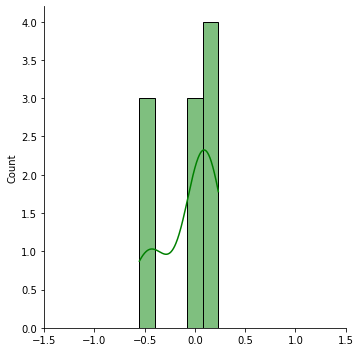

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

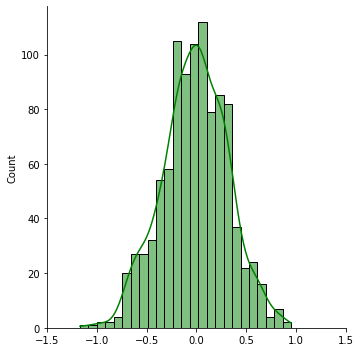

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

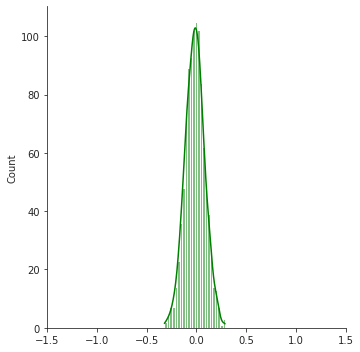

In [ ]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

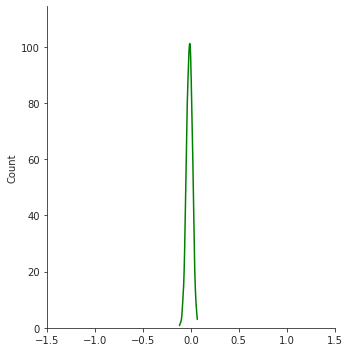

In [ ]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [ ]:
s = st.skewnorm.rvs(10, size=10000)

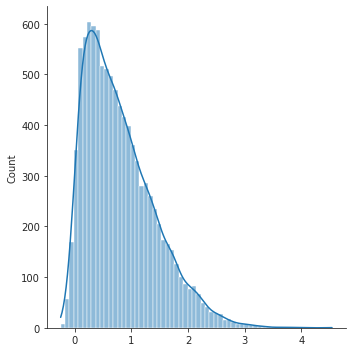

In [ ]:
_ = sns.displot(s, kde=True)

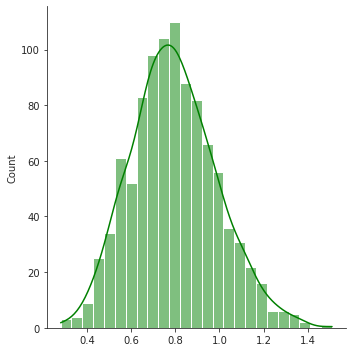

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

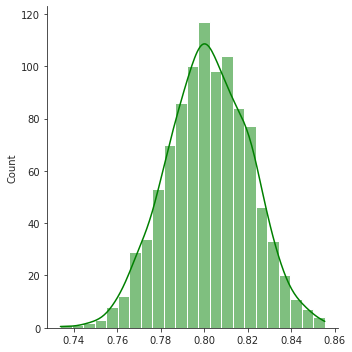

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [ ]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

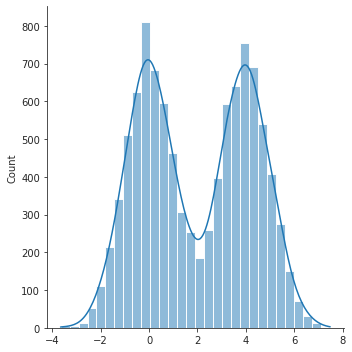

In [ ]:
_ = sns.displot(m, kde=True)

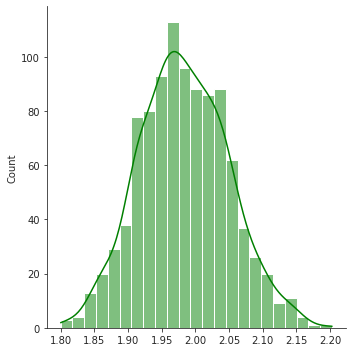

In [ ]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

In [ ]:
u = np.random.uniform(size=10000)

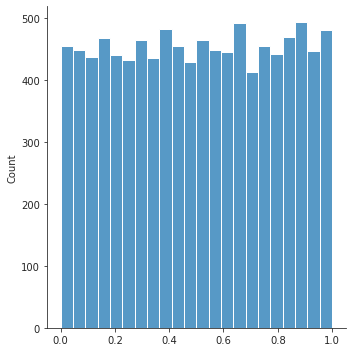

In [ ]:
_ = sns.displot(u)

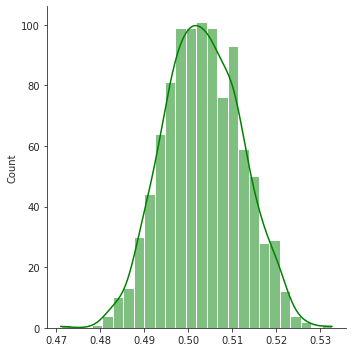

In [ ]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not. 

### z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is: 
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [ ]:
x_i = 85
mu = 60
sigma = 10

In [ ]:
x = np.random.normal(mu, sigma, 10000)

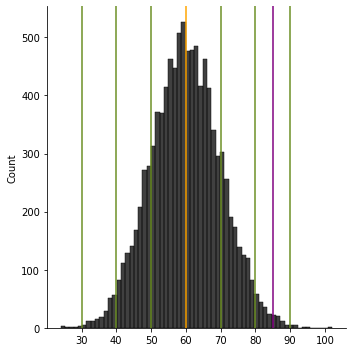

In [ ]:
sns.displot(x, color='black')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations above the mean: 

In [ ]:
z = (x_i - mu)/sigma
z

2.5

Or using our simulated class of 10k CS101 students: 

In [ ]:
z = (x_i - np.mean(x))/np.std(x)
z

2.5063103401632336

Less than one percent of the class outperformed you: 

In [ ]:
len(np.where(x > 85)[0])

69

In [ ]:
100*69/10000

0.69

In [ ]:
np.percentile(x, 99)

83.35787058294662

In contrast, if the mean score of your peers is 90 and the standard deviation is 2: 

In [ ]:
mu = 90
sigma = 2

In [ ]:
y = np.random.normal(mu, sigma, 10000)

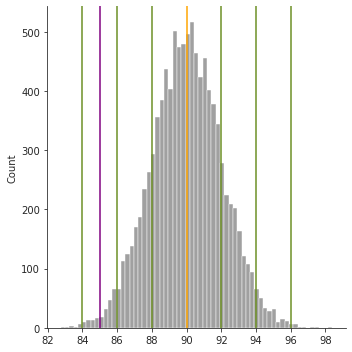

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations *below* the mean (!): 

In [ ]:
z = (x_i - mu)/sigma
z

-2.5

Or using our simulated class of 10k CS101 students: 

In [ ]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.479852596293303

In which case, over 99% of the class outperformed you: 

In [ ]:
len(np.where(y > 85)[0])

9933

In [ ]:
100*9933/10000

99.33

A mere 67 folks attained worse: 

In [ ]:
10000-9933

67

In [ ]:
np.percentile(y, 1)

85.3781445632019

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**. 

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

### *p*-values

These quantify the *p*robability that a given observation would occur by chance alone. 

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time: 
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF): 

In [ ]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [ ]:
p_below*10000

62.096653257761325

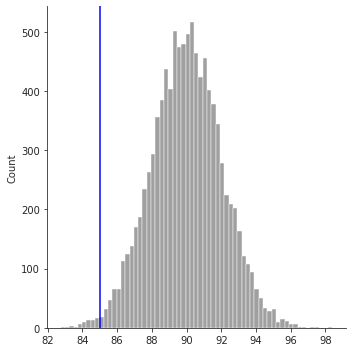

In [ ]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [ ]:
st.norm.cdf(2.5)

0.9937903346742238

In [ ]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [ ]:
p_above*10000

62.09665325776159

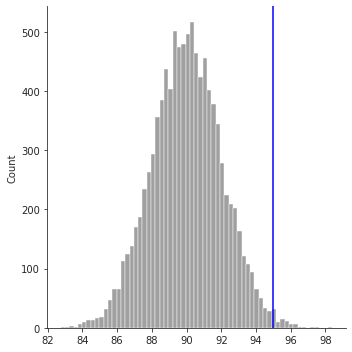

In [ ]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [ ]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [ ]:
p_outside*10000

124.1933065155229

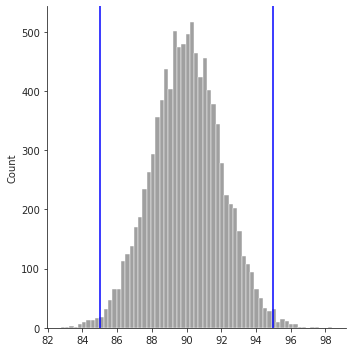

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p \approx .0124$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

For example, with a fair coin, the probability of throwing six heads *or* six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for *either of* six heads or six tails). Refer back to the `coinflip_prob()` method from the [*Probability* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/5-probability.ipynb) for proof.

If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.

The *z*-scores corresponding to $\alpha = .05$ can be obtained from the normal distribution's *percent point function* (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top: 

In [ ]:
st.norm.ppf(.025)

-1.9599639845400545

In [ ]:
st.norm.ppf(.975)

1.959963984540054

Thus, at the traditional $\alpha = .05$, a sampled value with *z*-score less than -1.96 or greater than 1.96 would be considered statistically significant.

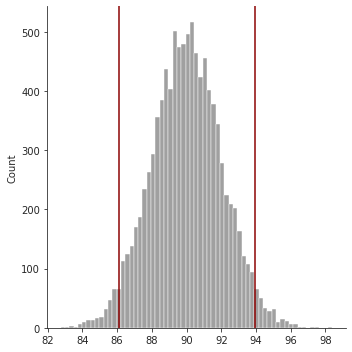

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

With a stricter threshold, say $\alpha = .01$:

In [ ]:
st.norm.ppf(.005)

-2.575829303548901

In [ ]:
st.norm.ppf(.995)

2.5758293035489004

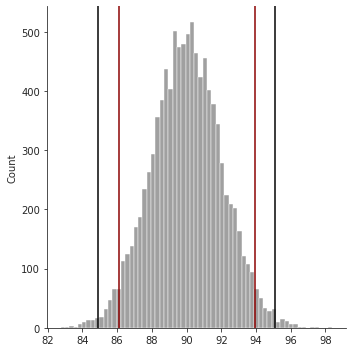

In [ ]:
sns.displot(y, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')

(Time-permitting, a discussion of two-tailed vs one-tailed *p*-value tests would be informative here.)

**Exercises**

1. What are the *p*-values associated with your weightlifting results from the three preceding exercises? 
2. With the standard $\alpha = .05$, which of the three weightlifting results are "statistically significant"?

**Spoiler alert**: Solutions below

**Solutions**

1a. This result is at the mean, which is also the median for a normal distribution; exactly half of the values are above as they are below. This corresponds to the highest possible $p$-value, $p=1$, because any value in the distribution is guaranteed to be above it or below it: 

In [ ]:
p_below = st.norm.cdf(0)
p_below

0.5

In [ ]:
p_above = 1-st.norm.cdf(0)
p_above

0.5

In [ ]:
p_below + p_above

1.0

More generally: 

In [ ]:
def p_from_z(my_z):
    return 2 * st.norm.cdf(-abs(my_z))

In [ ]:
p_from_z(0)

1.0

1b. The probability of a value being below $z = -2$ is:

In [ ]:
p_below = st.norm.cdf(-2)
p_below

0.022750131948179195

...and the probability of a value being above $z=2$ is the same: 

In [ ]:
p_above = 1-st.norm.cdf(2)
p_above

0.02275013194817921

Therefore, the *p*-value -- the probability that a value is below $z=-2$ or above $z=2$ -- is:

In [ ]:
p_below + p_above

0.0455002638963584

In [ ]:
p_from_z(2)

0.04550026389635839

1c. Following the same calculations as we did for 1b, the *p*-value for an observation 4 standard deviations away from the mean is: 

In [ ]:
p_from_z(4)

6.334248366623973e-05

...which is about 0.0000633: 

In [ ]:
0.0000633

6.33e-05

(Incidentally, very small *p* values are often reported as **negative log *P*** values as these are much easier to read...)

In [ ]:
-np.log10(6.33e-05)

4.198596289982645

2. The absolute value of the *z*-score for your snatch as well as your combined score is greater than 1.96 so they're both "statistically significant". Your performance on the clean and jerk could not have been less significant! 

### Comparing Means with *t*-tests

Where *z*-scores apply to *individual values* only, *t*-tests enables us to compare (the mean of) a sample of *multiple values* to a reference mean.

#### Student's Single-Sample *t*-test

Named after William Sealy Gosset, an Oxford-trained scientist and mathematician, who became a stout yield statistician for Guinness in Dublin (from 1899 to his fatal heart attack in 1937 shortly after being promoted to head brewer). Alongside sabbaticals in Karl Pearson's UCL Biometric Laboratory, Gosset published under the pseudonym Student (including on the *t*-test, starting in 1908) as it was against Guinness policy to publish.

Recalling the formula for calculating a *z*-score: 
$$ z = \frac{x_i-\mu}{\sigma} $$

The **single-sample *t*-test** is a variation on the theme and is defined by: 
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where: 
* $\bar{x}$ is the sample mean
* $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
* $s_{\bar{x}}$ is the sample standard error

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments: 

In [ ]:
x = [48, 50, 54, 60]

We can obtain the *t*-statistic for this sample as follows: 

In [ ]:
xbar = np.mean(x)
xbar

53.0

In [ ]:
sx = st.sem(x)
sx

2.6457513110645907

In [ ]:
t = (xbar-50)/sx
t

1.1338934190276817

We can convert the *t*-value into a *p*-value using Student's *t*-distribution (similar to the normal *z*-distribution, but varies based on number of data points in sample; see [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for more detail):

In [ ]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # 2nd arg to t.cdf() is "degrees of freedom"

In [ ]:
p_from_t(t, len(x))

0.3392540508564543

(An illustration of **degrees of freedom**: If we know the mean of the array `x`, three of its four values can vary freely. That is, if we know three of the values in the array, the fourth has no "freedom"; it must be a specific value. Thus, the most common situation with statistical tests is that we have *n*-1 degrees of freedom.)

For everyday usage, however, we can rely on the SciPy `ttest_1samp()` method: 

In [ ]:
st.ttest_1samp(x, 50)

Ttest_1sampResult(statistic=1.1338934190276817, pvalue=0.3392540508564543)

### Confidence Intervals

When examining sample means as we have been for the *t*-test, a useful statistical tool is the **confidence interval** (CI), which we for example often see associated with polling results when there's an upcoming election. CIs allow us to make statements such as "there is a 95% chance that the population mean lies within this particular range of values".

We can calculate a CI by rearranging the *z*-score formula: 
$$ \text{C.I.} = \bar{x} \pm z \frac{s}{\sqrt{n}} $$
Where: 
* $\bar{x}$ is the sample mean
* $s$ is the sample standard deviation
* $n$ is the sample size
* $z$ corresponds to a *z*-score threshold (e.g., the most common 95% CI is $z \pm 1.960$; other popular ones are the 90% CI at $z \pm 1.645$ and the 99% CI at $z \pm 2.576$)

For example, to find the 95% confidence interval for the true mean yield of our GMO yeast: 

In [ ]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])

In [ ]:
xbar = x.mean()
s = x.std()
n = x.size

In [ ]:
z = 1.96

In [ ]:
def CIerr_calc(my_z, my_s, my_n):
    return my_z*(my_s/my_n**(1/2))

In [ ]:
CIerr = CIerr_calc(z, s, n)

In [ ]:
CIerr

3.4637403013216796

In [ ]:
xbar + CIerr

58.08874030132168

In [ ]:
xbar - CIerr

51.16125969867832

Therefore, there's a 95% chance that the true mean yield of our GMO yeast lies in the range of 51.2 to 58.1 liters. Since this CI doesn't overlap with the established baseline mean of 50L, this corresponds to stating that the GMO yield is significantly greater than the baseline where $\alpha = .05$, as we already determined: 

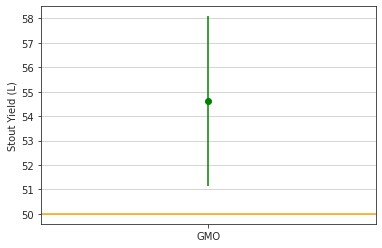

In [ ]:
fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [CIerr], fmt='o', color='green')
_ = ax.axhline(50, color='orange')

Similarly, we can compare several sample means with CIs. Using our penguins again: 

In [ ]:
fCIerr = CIerr_calc(z, sf, nf)
mCIerr = CIerr_calc(z, sm, nm)

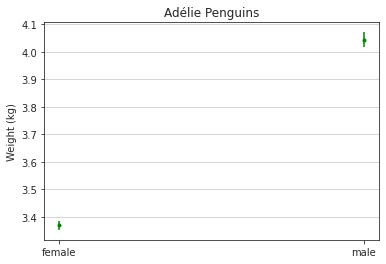

In [ ]:
fig, ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [fbar, mbar], [fCIerr, mCIerr], 
                fmt='.', color='green')

The CIs are nowhere near overlapping, corresponding to the extremely significant (-log*P* $\approx 25$) difference in penguin weight.

In contrast, the CIs for female penguins from the three islands...

In [ ]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

In [ ]:
means = [t.mean(), b.mean(), d.mean()]

In [ ]:
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1) # s_t to disambiguate stats package

In [ ]:
nt, nb, nd = t.size, b.size, d.size

In [ ]:
CIerrs = [CIerr_calc(z, s_t, nt), CIerr_calc(z, sb, nb), CIerr_calc(z, sd, nd)]

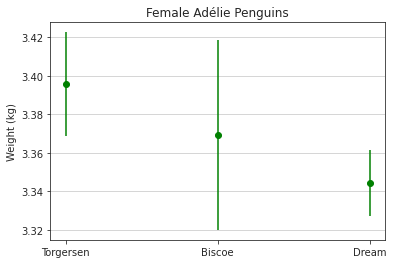

In [ ]:
fig, ax = plt.subplots()
plt.title('Female Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, CIerrs, 
                fmt='o', color='green')

### ANOVA: Analysis of Variance

**Analysis of variance** (ANOVA) enables us to compare more than two samples (e.g., all three islands in the case of penguin weight) in a single statistical test.

To apply ANOVA, we must make three assumptions: 
1. Independent samples
2. Normally-distributed populations
3. *Homoscedasticity*: Population standard deviations are equal

While not especially complicated under the hood (you can dig into the formulae [here](https://en.wikipedia.org/wiki/Analysis_of_variance#Logic)), ANOVA might be the least widely-applicable topic within *Intro to Stats* to ML so in the interest of time, we'll skip straight to the Python code: 

In [ ]:
st.f_oneway(t, b, d)

F_onewayResult(statistic=0.22627752438542714, pvalue=0.7980777848719299)

### Pearson Correlation Coefficient

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. Correlation is much more common because of this difference. 

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = iris.sepal_length
y = iris.petal_length

In [ ]:
sns.set_style('darkgrid')

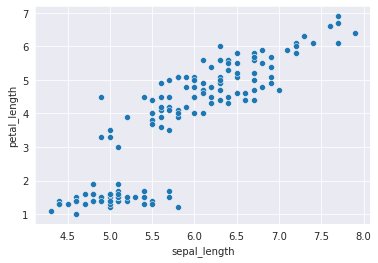

In [ ]:
_ = sns.scatterplot(x=x, y=y)

In [ ]:
n = iris.sepal_width.size

In [ ]:
xbar, ybar = x.mean(), y.mean()

In [ ]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [ ]:
cov = sum(product)/n
cov

1.2658199999999995

In [ ]:
r = cov/(np.std(x)*np.std(y))
r

0.8717537758865828

We reached this point in *Probability*. Now, as for how to determine a *p*-value, we first calculate the *t*-statistic...
$$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

In [ ]:
t = r*((n-2)/(1-r**2))**(1/2)
t

21.64601934575973

...which we can convert to a *p*-value as we've done several times above: 

In [ ]:
p = p_from_t(t, n-1) 
p

1.0386674194500194e-47

In [ ]:
-np.log10(p)

46.98352349096027

This confirms that iris sepal length is extremely positively correlated with petal length.

All of the above can be done in a single line with SciPy's `pearsonr()` method: 

In [ ]:
st.pearsonr(x, y)

(0.8717537758865831, 1.0386674194498099e-47)

And, for reference, here's a correlation that is not significant ($r \approx 0$): 

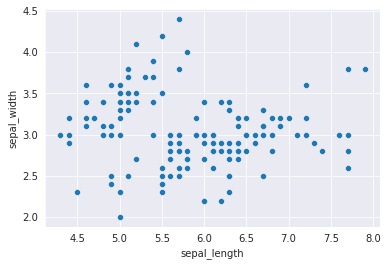

In [ ]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [ ]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

(-0.11756978413300206, 0.15189826071144766)

### Correlation vs Causation

Correlation doesn't imply **causation** on its own. E.g., sepal length and petal length are extremely highly correlated, but this doesn't imply that sepal length causes petal length or vice versa. 

There is a lot to causality and I recommend Judea Pearl's [*Causality*](http://bayes.cs.ucla.edu/BOOK-2K/), the classic technical text on the topic, if you're keen to explore this in depth. [*The Book of Why*](http://bayes.cs.ucla.edu/WHY/) is an exceptional lay alternative by the same author.

In brief, three criteria are required for inferring causal relationships: 

1. **Covariation**: Two variables vary together (this criterion is satisfied by sepal and petal length)
2. **Temporal precedence**: The affected variable must vary *after* the causal variable is varied. 
3. **Elimination of extraneous variables**: We must be sure no third variable is causing the variation. This can be tricky for data we obtained through observation alone, but easier when we can control the causal variable, e.g., with (ideally double-blind) randomized control trials. 

Some examples of where we could infer causality from correlation in ML: 
* Additional neurons --> higher accuracy
* Additional servers or RAM --> shorter inference time
* Removal of pronouns --> less unwanted bias

### Correcting for Multiple Comparisons

A major issue with frequentist statistics is the issue of multiple comparisons:

* If you perform 20 statistical tests where there is no real effect (i.e., the null hypothesis is true), then we would expect one of them to come up significant by chance alone (i.e., a *false positive* or *Type I error*).
* If you perform a hundred tests in such a circumstance, then you should expect five false positives.

The most straightforward, and indeed the most widely-used, solution is the **Bonferroni correction** (named after the 20th c. Italian mathematician Carlo Emilio Bonferroni). Assuming, we'd like an overall $\alpha = .05$: 

* If we're planning on conducting ten tests ($m=10$), the significance threshold for each individual test is $\frac{\alpha}{m} = \frac{.05}{10} = .005$
* With 20 tests, it's $\frac{\alpha}{m} = \frac{.05}{20} = .0025$
* With 100 tests, it's $\frac{\alpha}{m} = \frac{.05}{100} = .0005$

(Other, less straightforward, approaches for adjusting $\alpha$ for multiple comparisons exist. They're beyond our scope, but the major ones are listed under the *General methods of alpha adjustment for multiple comparisons* heading [here](https://en.wikipedia.org/wiki/Multiple_comparisons_problem#See_also).)

In [ ]:
x = adelie[adelie.sex == 'Female']['flipper_length_mm'].to_numpy()
y = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000

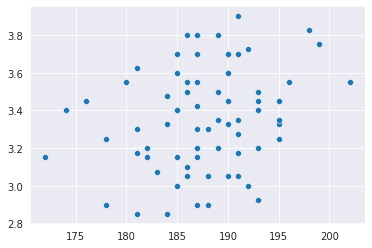

In [ ]:
_ = sns.scatterplot(x=x, y=y)

In [ ]:
cov_mat = np.cov(x, y)
cov_mat

array([[31.304414  ,  0.3962852 ],
       [ 0.3962852 ,  0.07256564]])

In [ ]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

0.012659083726357767

In [ ]:
beta0 = y.mean() - beta1*x.mean()
beta0

0.9915290574707036

In [ ]:
x_i = 197

In [ ]:
y_i = beta0 + beta1*x_i
y_i

3.485368551563184

In [ ]:
xline = np.linspace(170, 205, 1000)
yline = beta0 + beta1*xline

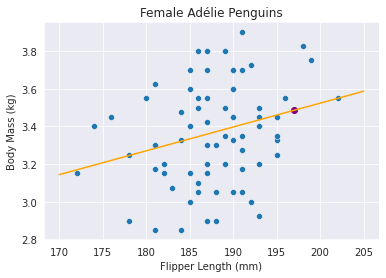

In [ ]:
sns.scatterplot(x=x, y=y)
plt.title("Female Adélie Penguins")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (kg)")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')